**Machine Learning : ANN**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32') / 255


In [4]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [8]:
history = model.fit(x_train, y_train_cat,
                    validation_split=0.1,
                    epochs=20,
                    batch_size=128,
                    callbacks=[es],
                    verbose=1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8455 - loss: 0.5128 - val_accuracy: 0.9685 - val_loss: 0.1044
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9631 - loss: 0.1201 - val_accuracy: 0.9745 - val_loss: 0.0805
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9763 - loss: 0.0766 - val_accuracy: 0.9782 - val_loss: 0.0725
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9813 - loss: 0.0585 - val_accuracy: 0.9805 - val_loss: 0.0645
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9858 - loss: 0.0445 - val_accuracy: 0.9793 - val_loss: 0.0725
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9867 - loss: 0.0396 - val_accuracy: 0.9830 - val_loss: 0.0662
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9888 - loss: 0.0334 - val_accuracy: 0.9842 - val_loss: 0.0621
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9909 - loss: 0.0276 - val_acc

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')



Test accuracy: 0.9803


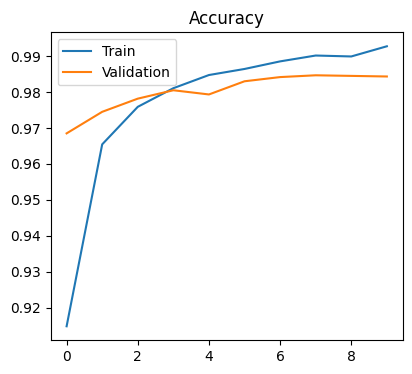

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()


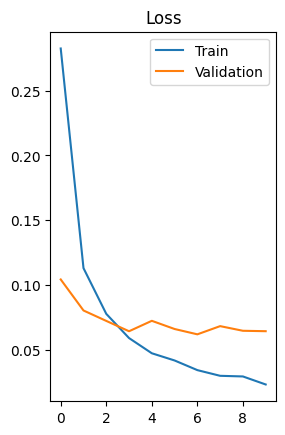

In [11]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


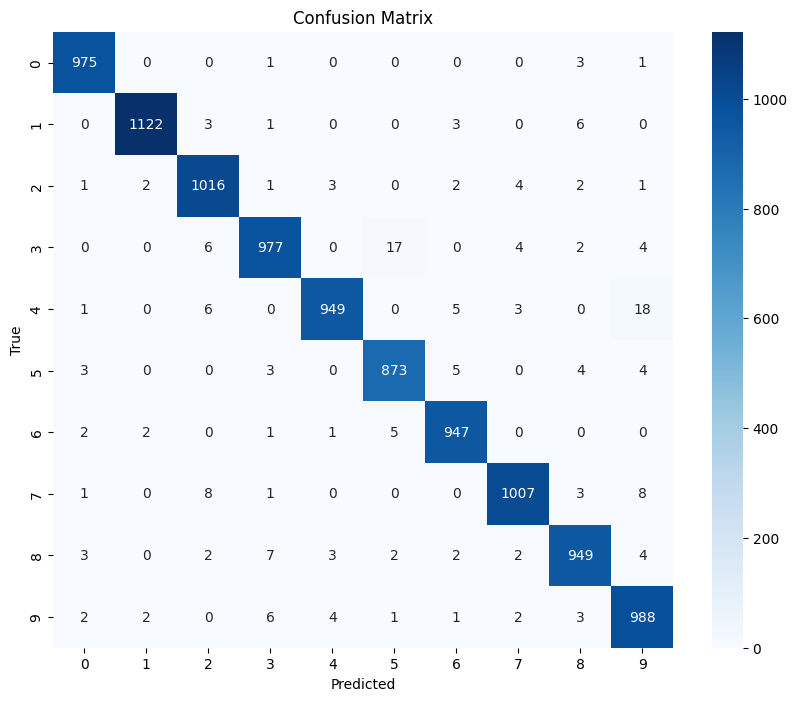

In [13]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))



Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



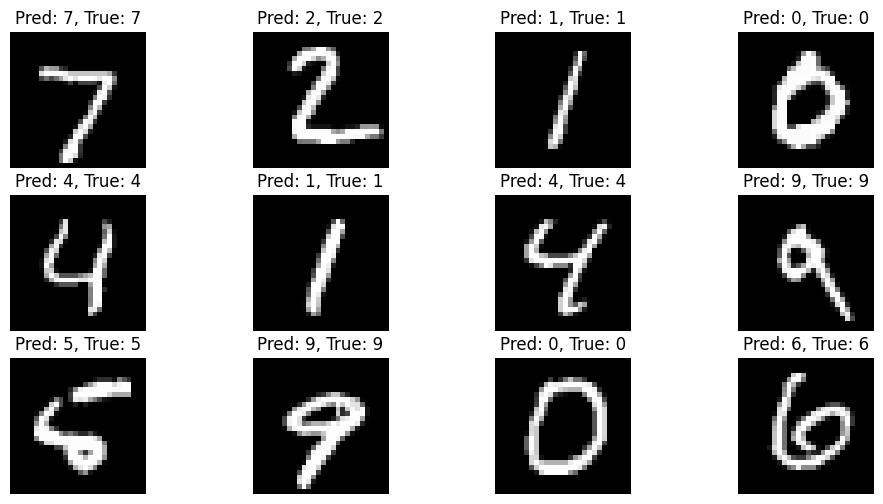

In [15]:
plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()